### Import needed libraries

In [2]:
# base libraries
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import matplotlib.image as mpimg 

import random

# essential object detection libraries
import os
import cv2
from IPython.display import display, Image
import json

### Read in the dataset

In [3]:
# Specify the path to the train JSON file
train_json_path = '/Users/mobinaamrollahi/Documents/01.University/01. Iowa State University/IE587 - Big Data Analytics & Optimization/Project/Dataset/The BDD100K data/labels/det_train.json'

# Specify the path to the validation JSON file
val_json_path = '/Users/mobinaamrollahi/Documents/01.University/01. Iowa State University/IE587 - Big Data Analytics & Optimization/Project/Dataset/The BDD100K data/labels/det_val.json'

# Load the head of the train JSON file
with open(train_json_path, 'r') as f_train:
    train_data = json.load(f_train)

# Print the head of the train data
print("Head of Train Data:")
print(train_data[:1])  # Adjust the number 5 based on how many entries you want to display

# Load the head of the validation JSON file
with open(val_json_path, 'r') as f_val:
    val_data = json.load(f_val)

# Print the head of the validation data
print("\nHead of Validation Data:")
print(val_data[:1])  # Adjust the number 5 based on how many entries you want to display

Head of Train Data:
[{'name': '0000f77c-6257be58.jpg', 'attributes': {'weather': 'clear', 'timeofday': 'daytime', 'scene': 'city street'}, 'timestamp': 10000, 'labels': [{'id': '0', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'G'}, 'category': 'traffic light', 'box2d': {'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}}, {'id': '1', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'G'}, 'category': 'traffic light', 'box2d': {'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}}, {'id': '2', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'NA'}, 'category': 'traffic sign', 'box2d': {'x1': 1105.66915985699, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}}, {'id': '3', 'attributes': {'occluded': False, 'truncated': True, 'trafficLightColor': 'NA'}, 'category': 'traffic sign', 'box2d': {'x1': 0.0, 'y1': 0.246631, 'x2': 100.381647, 'y2': 122.825696}}, {'id': 

In [4]:
# Specify the directory containing the images for the training set
train_image_dir = '/Users/mobinaamrollahi/Documents/01.University/01. Iowa State University/IE587 - Big Data Analytics & Optimization/Project/Dataset/The BDD100K data/images/100k/train'

# List all image files in the directory
train_image_files = os.listdir(train_image_dir)

# Print a few image filenames
print("Head of Train Image Filenames:")
print(train_image_files[:5])

Head of Train Image Filenames:
['61c0de9c-996cae66.jpg', '6dd63871-831611a6.jpg', '82c1005c-e2d1d94f.jpg', '7f2e1814-6591087d.jpg', '06924f46-1708b96f.jpg']


In [5]:
# Specify the directory containing the images for the validation set
val_image_dir = '/Users/mobinaamrollahi/Documents/01.University/01. Iowa State University/IE587 - Big Data Analytics & Optimization/Project/Dataset/The BDD100K data/images/100k/val'

# List all image files in the directory
val_image_files = os.listdir(val_image_dir)

# Print a few image filenames
print("Head of Validation Image Filenames:")
print(val_image_files[:5])

Head of Validation Image Filenames:
['ca35c192-7f0eadba.jpg', 'c08b49d7-164707bb.jpg', 'c43eaa20-8450cd59.jpg', 'c49d39a3-738d6240.jpg', 'b25fd5d3-fa4bfca0.jpg']


In [6]:
# Specify the directory containing the images for the test set
test_image_dir = '/Users/mobinaamrollahi/Documents/01.University/01. Iowa State University/IE587 - Big Data Analytics & Optimization/Project/Dataset/The BDD100K data/images/100k/test'

# List all image files in the directory
test_image_files = os.listdir(test_image_dir)

# Print a few image filenames
print("Head of Test Image Filenames:")
print(test_image_files[:5])

Head of Test Image Filenames:
['e43a15ab-a06fecc7.jpg', 'dd19e8ce-6fb8afb4.jpg', 'db4a2b00-066f26b4.jpg', 'f85be9cf-0978793f.jpg', 'd2c62c9d-52768c29.jpg']


### Explore the Dataset

In [7]:
# Print the length or number of keys in train_data
if isinstance(train_data, list):
    print("Number of entries in train_data:", len(train_data))
elif isinstance(train_data, dict):
    print("Number of keys in train_data:", len(train_data))
else:
    print("train_data has an unexpected structure.")
    
# Print the number of images in train set   
print("Number of images in the training set:", len(train_image_files))    


# Print the length or number of keys in val_data
if isinstance(val_data, list):
    print("Number of entries in val_data:", len(val_data))
elif isinstance(val_data, dict):
    print("Number of keys in val_data:", len(val_data))
else:
    print("val_data has an unexpected structure.")
    
# Print the number of images in val set
print("Number of images in the validation set:", len(val_image_files))

Number of entries in train_data: 69863
Number of images in the training set: 70000
Number of entries in val_data: 10000
Number of images in the validation set: 10000


<span style="color:red">What should I do? since the number of train images and jason enteries are inconsisten?</span> Loop over jason file names and train image names, and do the comparison. Make a set based on those two 1D arrays, and drop the images that come from minusing.

In [8]:
# Check for duplicates in train_data
train_entry_set = set(entry['name'] for entry in train_data)
num_duplicates_train = len(train_data) - len(train_entry_set)

# Check for duplicates in val_data
val_entry_set = set(entry['name'] for entry in val_data)
num_duplicates_val = len(val_data) - len(val_entry_set)

print("Number of duplicates in train_data:", num_duplicates_train)
print("Number of duplicates in val_data:", num_duplicates_val)

Number of duplicates in train_data: 0
Number of duplicates in val_data: 0


<span style="color:red">I want to follow the same approach as the autism dataset and understand the data description before doing anything. However, I don't know how it will be applied to this dataset.</span> 
1. Make sure all the image are with the same size. Chunk the data into the same size.
2. How you center your image.

### Data Visualization

In [9]:
# Convert the list of dictionaries to a Pandas DataFrame
train_df = pd.DataFrame(train_data)

# Check the dimensions of the DataFrame
dimensions = train_df.shape
print("Dimensions of train_df:", dimensions)

Dimensions of train_df: (69863, 4)


In [10]:
column_names = train_df.columns
print("Column names:", column_names)

Column names: Index(['name', 'attributes', 'timestamp', 'labels'], dtype='object')


In [11]:
print(train_df['name'].head())
print(train_df['attributes'].head())
print(train_df['timestamp'].head())
print(train_df['labels'].head())

0    0000f77c-6257be58.jpg
1    0000f77c-62c2a288.jpg
2    0000f77c-cb820c98.jpg
3    0001542f-5ce3cf52.jpg
4    0001542f-7c670be8.jpg
Name: name, dtype: object
0    {'weather': 'clear', 'timeofday': 'daytime', '...
1    {'weather': 'clear', 'timeofday': 'dawn/dusk',...
2    {'weather': 'clear', 'timeofday': 'dawn/dusk',...
3    {'weather': 'clear', 'timeofday': 'night', 'sc...
4    {'weather': 'clear', 'timeofday': 'night', 'sc...
Name: attributes, dtype: object
0    10000
1    10000
2    10000
3    10000
4    10000
Name: timestamp, dtype: int64
0    [{'id': '0', 'attributes': {'occluded': False,...
1    [{'id': '7', 'attributes': {'occluded': False,...
2    [{'id': '13', 'attributes': {'occluded': False...
3    [{'id': '20', 'attributes': {'occluded': False...
4    [{'id': '33', 'attributes': {'occluded': False...
Name: labels, dtype: object


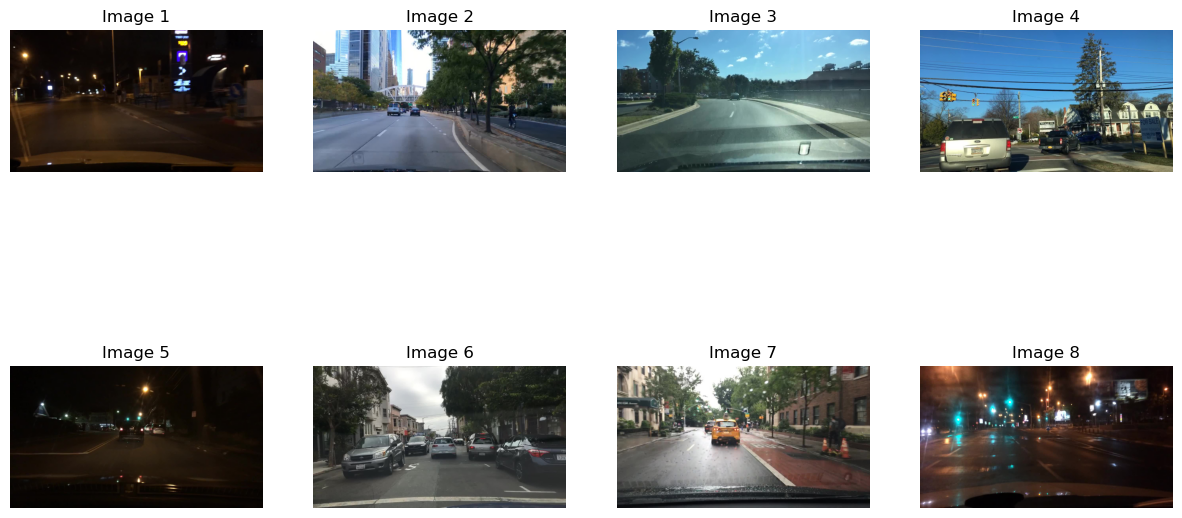

In [12]:
# Randomly select 8 images
selected_images = random.sample(train_image_files, 8)

# Plot the selected images
plt.figure(figsize=(15, 8))
for i, image_filename in enumerate(selected_images, 1):
    image_path = os.path.join(train_image_dir, image_filename)
    img = mpimg.imread(image_path)
    
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.title(f"Image {i}")
    plt.axis('off')

plt.show()

<span style="color:red">How should I study human situational awareness in this dataset? The dataset comes with many JSON files regarding different segmentations. Also, it would be really great if you could explain some of these segmentations.</span>

In [14]:
from PIL import Image
# Get the size of each image
image_sizes = {}
for image_filename in train_image_files:
    image_path = os.path.join(train_image_dir, image_filename)
    img = Image.open(image_path)
    width, height = img.size
    image_sizes[image_filename] = (width, height)

# Print the sizes of the first few images
for image_filename, size in list(image_sizes.items())[:5]:
    print(f"Image {image_filename} has size: {size}")

Image 61c0de9c-996cae66.jpg has size: (1280, 720)
Image 6dd63871-831611a6.jpg has size: (1280, 720)
Image 82c1005c-e2d1d94f.jpg has size: (1280, 720)
Image 7f2e1814-6591087d.jpg has size: (1280, 720)
Image 06924f46-1708b96f.jpg has size: (1280, 720)
